# Business Problem

- Can a machine learning project be realized for salary predictions of Malagasy developers who work in Madagascar?

# Dataset Story

- This dataset was originally taken from the facebook group of Malagasy Developers 'facedev'
- This contains just few observations but let's try if it will fit a good Machine Learning

**Variables**

- **Local:** The local of the company(Tana, Toliara, Mahajanga) or Remote
- **Titre:** Title of the post occupated
- **Exp:** The experience in year
- **Salary:** Our main target in Ariary per Month


# Roadmap

- **1. Import required libraries**
- **2. Loading the dataset**
- **3. Exploratory Data Analysis**
- **4. Analysis of categorical variables**
- **5. Correlation Analysis**
- **6. Examining the Logarithm of the depedent variable**
- **7. Outliers analysis**
- **8. Feature extraction**
- **9. Encoding**
- **10. Standardization Process**
- **11. Creating Model**
- **12. Hyperparameter optimization**
- **13. Final model predictions and comparison with true prices**

# 1. Import Required Libraries

In [1]:
# Import librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

# 2. Load the dataset

In [47]:
df = pd.read_csv("data/Karama (réponses) - Réponses _cleaned_.csv")

In [48]:
df.head(3)

,Firenena Hitoerana,Province/Remote,Titre,Taona niasana,Karama,Unité,Fréquence
0,Belgique,Bruxelles,Consultant IT,8,48 000,€ (EUR),Taona
1,Belgique,Belgique,Senior Fullstack.NET,10,66 000,€ (EUR),Taona
2,Canada,Québec,Analyste programmeur junior,"1,5",54 000,C$ (CAD),Taona


# 3. Exploratory Data Analysis

## We are only interested with Madagascar cases

In [49]:
df = df[df['Firenena Hitoerana'] == 'Madagascar']
df = df.rename(columns={
    'Province/Remote': 'company',
    'Titre': 'title',
    'Taona niasana': 'year_experience',
    'Karama': 'salary'
})

## A cleaned data is better than uncleaned :p

In [50]:
df['year_experience'] = df['year_experience'].str.replace(',', '.').astype(float)
df['company'] = df['company'].str.replace('Antananarivo', 'Tana').astype(str)
df['salary'] = df['salary'].str.replace(' ', '').astype(int)
df = df.drop(columns=['Firenena Hitoerana', 'Unité', 'Fréquence'])

In [51]:
df.head(3)

,company,title,year_experience,salary
34,Toamasina,Dev fullstack junior,0.5,300000
35,Tana,Stagiaire développeur backend,0.5,700000
36,Tana,Développeur angular junior,0.5,800000


In [52]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 34 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          194 non-null    object 
 1   title            194 non-null    object 
 2   year_experience  194 non-null    float64
 3   salary           194 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ KB
None
       year_experience        salary
count       194.000000  1.940000e+02
mean          3.775773  3.563695e+06
std           2.765907  3.964710e+06
min           0.500000  3.000000e+05
25%           2.000000  1.525000e+06
50%           3.000000  2.500000e+06
75%           5.000000  4.000000e+06
max          16.000000  3.700000e+07


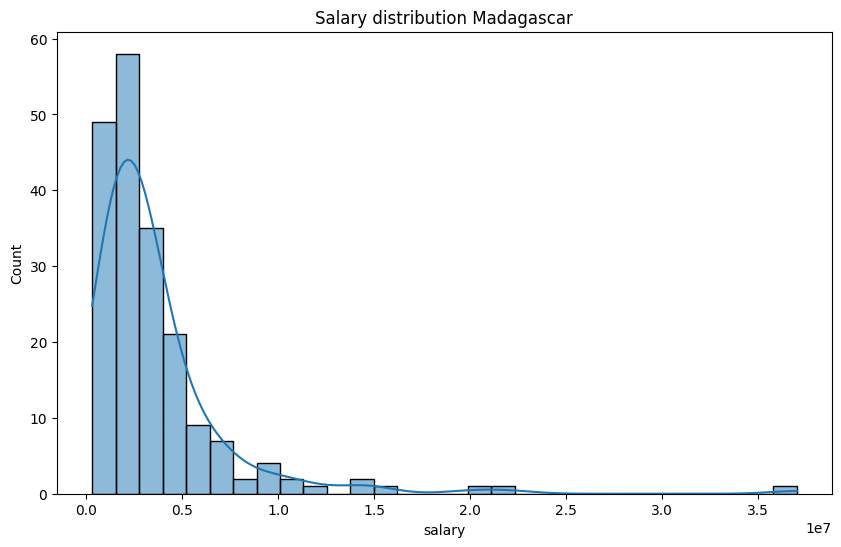

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=30, kde=True)
plt.title("Salary distribution Madagascar")
plt.show()

**that is far from the bell curve :)**

# 4. Analysis of categorical variables

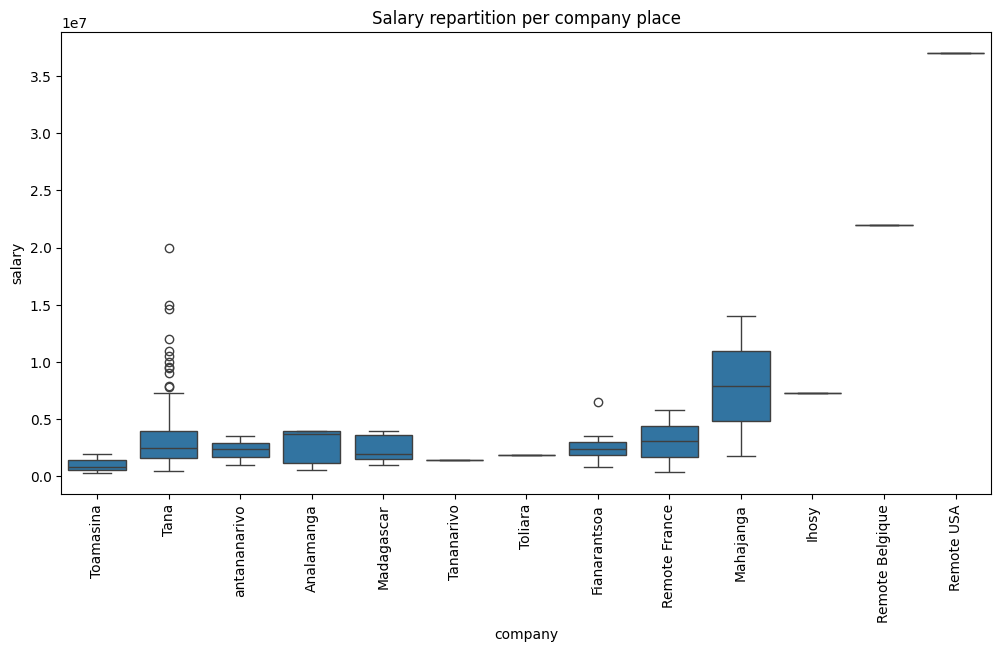

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='company', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary repartition per company place')
plt.show()

## There are some work to do with the company column 'o'

In [54]:
replace_to = {
    'Antananarivo': 'Tana', 'Analamanga': 'Tana', 'Madagascar': 'Tana', 'Tananarivo': 'Tana', 'antananarivo': 'Tana',
    'Toamasina': 'Faritra', 'Toliara': 'Faritra', 'Fianarantsoa': 'Faritra', 'Mahajanga': 'Faritra', 'Ihosy': 'Faritra',
    'Remote France': 'Remote', 'Remote Belgique': 'Remote', 'Remote USA': 'Remote'
} 

df['company'] = df['company'].replace(replace_to)

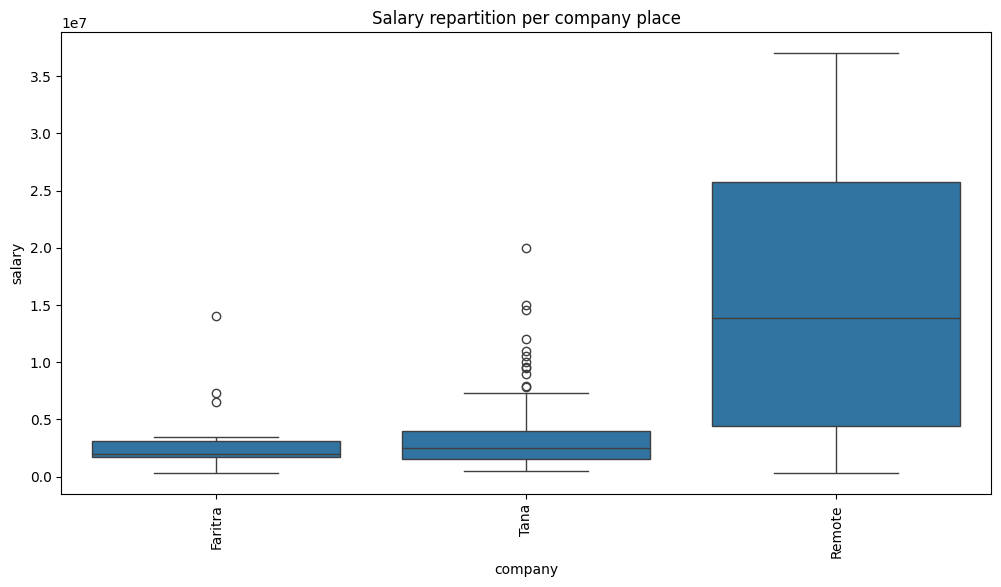

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='company', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary repartition per company place')
plt.show()

# 5. Correlation analysis

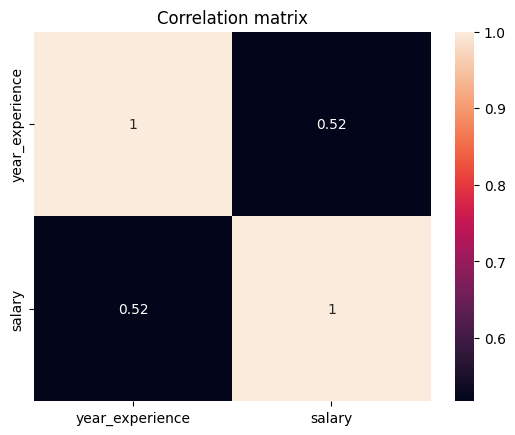

In [57]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix')
plt.show()